# KNN scipy --fail!

In [3]:
from scipy.spatial.distance import euclidean
import numpy as np

In [4]:
#create KNN class
class KNN:
    def fit():
        pass
    def predict():
        pass

In [5]:
#complete the fit() method:
# self = instance method of KNN class
#X_train: array, each row is a vector of a given point in space
# y_train: corresponding labels for each vector in X_train 
def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train
    
# This line updates the knn.fit method to point to the function you've just written
KNN.fit = fit

In [6]:
#helper function: creates empty array to hold euclidean distance between x and X_Train
#Creates tuple using index and the distance, append to array
#return the distance arrray when distance has been generated for all items in self.X_train
def _get_distances(self, x):
    distances = []
    for ind, val in enumerate(self.X_train):
        dist_to_i = euclidean(x, val)
        distances.append((ind, dist_to_i))
    return distances

# This line attaches the function you just created as a method to KNN class 
KNN._get_distances = _get_distances

In [7]:
#function to retreive indices of k-nearest points
#3 arguments: 1) self
# 2)dists: an array of tuples containing (index, distance), from _get_distances()
# 3) k: the number of distances you want to return
#sort dists array by values (the second element in each tuple)
#return first k tuples from the sorted array
def _get_k_nearest(self, dists, k):
    sorted_dists = sorted(dists, key=lambda x: x[1])
    return sorted_dists[:k]

# This line attaches the function you just created as a method to KNN class 
KNN._get_k_nearest = _get_k_nearest

In [8]:
def _get_label_prediction(self, k_nearest):
        
    labels = [self.y_train[i] for i, _ in k_nearest]
    counts = np.bincount(labels)
    return np.argmax(counts)

# This line attaches the function you just created as a method to KNN class
KNN._get_label_prediction = _get_label_prediction

In [9]:
def predict(self, X_test, k=3):
    preds = []
    # Iterate through each item in X_test
    for i in X_test:
        # Get distances between i and each item in X_train
        dists = self._get_distances(i)
        k_nearest = self._get_k_nearest(dists, k)
        predicted_label = self._get_label_prediction(k_nearest)
        preds.append(predicted_label)
    return preds

# This line updates the knn.predict method to point to the function you've just written
KNN.predict = predict

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
pd.set_option('display.max_columns', None)
data = pd.read_csv('HepCDF.csv', index_col=0)


In [11]:
transplant = data['Transplant']
data = data.drop('Transplant', axis = 1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, transplant, test_size=0.25, random_state=0)

In [13]:
# Instantiate and fit KNN
knn = KNN()
knn.fit(X_train, y_train)


In [14]:
# Generate predictions
preds = knn.predict(X_test)
# for error https://stackoverflow.com/questions/36637428/typeerror-ufunc-subtract-did-not-contain-a-loop-with-signature-matching-types
with open(test_name,'a') as knnpred :
    lenpredictions = len(preds)
    lentrue = y_test.shape[0]
    if lenpredictions == lentrue :
            knnpred.write("Names/Label,, Prediction KNN,, True Value,\n")
            for i in range(0,lenpredictions) :
                    fpred.write(str(preds[i])+",,"+str(y_test[i])+",\n")
    else :
            print ("ERROR - names, prediction and true value array size mismatch.")

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U3'), dtype('<U3')) -> dtype('<U3')

# KNN -- scikitlearn

In [12]:
import pandas as pd
data = pd.read_csv('HepCDF.csv', index_col=0)

In [13]:
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Transplant
0,56,0,35,0,0,0,0,0,0,0,...,84,84,34,655330,634536,288194,386384,387088,13,0
1,46,0,29,0,0,0,0,0,0,0,...,57,123,44,40620,538635,637056,336804,31085,4,0
2,57,0,33,0,0,0,0,0,0,0,...,84,84,34,571148,661346,406373,735945,558829,4,1
3,49,0,33,0,0,0,0,0,0,0,...,48,77,33,1041941,449939,585688,744463,582301,10,0
4,59,0,32,0,0,0,0,0,0,0,...,94,90,30,660410,738756,3731527,338946,242861,11,0


In [14]:
one_hot_df = pd.get_dummies(data)
one_hot_df.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Transplant
0,56,0,35,0,0,0,0,0,0,0,...,84,84,34,655330,634536,288194,386384,387088,13,0
1,46,0,29,0,0,0,0,0,0,0,...,57,123,44,40620,538635,637056,336804,31085,4,0
2,57,0,33,0,0,0,0,0,0,0,...,84,84,34,571148,661346,406373,735945,558829,4,1
3,49,0,33,0,0,0,0,0,0,0,...,48,77,33,1041941,449939,585688,744463,582301,10,0
4,59,0,32,0,0,0,0,0,0,0,...,94,90,30,660410,738756,3731527,338946,242861,11,0


In [15]:
labels = one_hot_df['Transplant']
one_hot_df.drop('Transplant', axis=1, inplace=True)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(one_hot_df, labels, test_size=0.25, random_state=42)

In [17]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=one_hot_df.columns)
scaled_df_train.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
0,-0.163688,0.0,0.597301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.147591,1.520947,-0.150722,-1.711327,0.111495,-0.718036,1.429024,0.866877,1.799051,1.543625
1,-0.850186,0.0,-0.389565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.591789,-1.635308,1.361803,-0.409754,-1.231450,-1.267050,-0.336012,-0.871548,-0.665135,0.230494
2,-0.850186,0.0,-1.376430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.954561,-1.250399,0.237105,1.614914,-1.319204,-1.463061,0.027071,-0.042802,-0.065792,-0.032133
3,-0.049272,0.0,1.584166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.261606,0.443202,0.586149,1.325676,-1.660569,1.620215,-1.523626,-0.028866,1.220499,-1.607890
4,-0.621354,0.0,0.103868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033575,-1.096435,0.353453,0.891818,-0.282901,-0.263948,0.027071,-0.042802,-0.065792,1.018373


In [18]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [19]:
# Import the necessary functions
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [20]:
# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.2909090909090909
Recall Score: 0.16842105263157894
Accuracy Score: 0.659942363112392
F1 Score: 0.21333333333333332


In [21]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))

In [22]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best Value for k: 1


ValueError: Found input variables with inconsistent numbers of samples: [1385, 347]

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [24]:
def knn_comparison(data, k):
    x = data.values
    y = data['Transplant'].astype(int).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
# Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
#     plt.xlabel(‘x’)
#     plt.ylabel(‘Y’)
#     plt.title(‘Knn with K=’+ str(k))
    plt.show()

ValueError: Filler values must be provided when X has more than 2 training features.

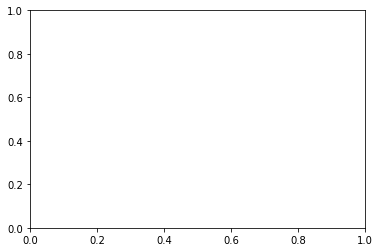

In [25]:
for i in [1,5,20,30,40,80]:
    knn_comparison(data, i)